# Table of content
* Import data
* EDA
* Feature engineering
* machine learning


# Import data

In [1]:
# import required packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.simplefilter('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# see available styles for plots
print(plt.style.available)

# set data_path
dir = 'D:/3_learn/9_MachineLearning/data/Midterm'
dir_train = os.path.join(dir, 'train_data.csv')
dir_test  = os.path.join(dir, 'test_features.csv')

# import data
train = pd.read_csv(dir_train)
test  = pd.read_csv(dir_test)
trainLabel = train['poi']

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


C:\Users\Ocean\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# see data structure
print(f'train shape: {train.shape}')
print(f'test shape: {test.shape}')
print(f'trainLabel shape: {trainLabel.shape}')
# set plot style
plt.style.use('ggplot')

train shape: (113, 22)
test shape: (33, 21)
trainLabel shape: (113,)


# EDA

In [3]:
# All features are numerical.
train.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
name                         113 non-null object
bonus                        61 non-null float64
deferral_payments            28 non-null float64
deferred_income              34 non-null float64
director_fees                13 non-null float64
email_address                83 non-null object
exercised_stock_options      81 non-null float64
expenses                     73 non-null float64
from_messages                65 non-null float64
from_poi_to_this_person      65 non-null float64
from_this_person_to_poi      65 non-null float64
loan_advances                2 non-null float64
long_term_incentive          49 non-null float64
other                        69 non-null float64
poi                          113 non-null bool
restricted_stock             82 non-null float64
restricted_stock_deferred    10 non-null float64
salary                       73 non-null float64
shared_receipt_wi

In [5]:
#save columns with dtype of int64 or float64 in num_features
num_features = []
for dtype, feature in zip(train.dtypes, train.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

19 Numeric Features : ['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']



### logistic regression

In [6]:
# fill na as 0, minmaxscaler, logistic regression, reserve all features
train_numeric = train[num_features]
train_numeric = train_numeric.fillna(0)
train_numeric_mms = MinMaxScaler().fit_transform(train_numeric)
estimator = LogisticRegression()
cross_val_score(estimator, train_numeric_mms, trainLabel, cv=5).mean()

0.8940711462450592

In [7]:
# fill na as 0, standardscaler, logistic regression, reserve all features
train_numeric = train[num_features]
train_numeric = train_numeric.fillna(0)
train_numeric_sts = StandardScaler().fit_transform(train_numeric)
estimator = LogisticRegression()
cross_val_score(estimator, train_numeric_sts, trainLabel, cv=5).mean()

0.8671936758893282

### random forest classifier

In [8]:
# fill na as 0, minmaxscaler, random forest classifier, reserve all features
train_numeric = train[num_features]
train_numeric = train_numeric.fillna(0)
train_numeric_mms = MinMaxScaler().fit_transform(train_numeric)
estimator = RandomForestClassifier()
cross_val_score(estimator, train_numeric_mms, trainLabel, cv=5).mean()

0.8936758893280633

In [9]:
# fill na as 0, standardscaler, random forest classifier, reserve all features
train_numeric = train[num_features]
train_numeric = train_numeric.fillna(0)
train_numeric_sts = StandardScaler().fit_transform(train_numeric)
estimator = RandomForestClassifier()
cross_val_score(estimator, train_numeric_sts, trainLabel, cv=5).mean()

0.8849802371541502

In [10]:
# fill na as 0, standardscaler, random forest classifier, feature selection
# feature selection
# make a fitting with randomforestclassifier and see feature importance
rfc = RandomForestClassifier()
rfc.fit(train_numeric,trainLabel)
feats = pd.Series(data=rfc.feature_importances_, index=train_numeric.columns)
feats = feats.sort_values(ascending=False)
feats

other                        0.158171
expenses                     0.148877
total_payments               0.073927
long_term_incentive          0.059091
exercised_stock_options      0.057934
to_messages                  0.054563
salary                       0.054515
from_poi_to_this_person      0.054503
bonus                        0.054454
deferred_income              0.049128
from_this_person_to_poi      0.046573
from_messages                0.041634
shared_receipt_with_poi      0.039042
restricted_stock             0.033711
total_stock_value            0.031421
loan_advances                0.014710
restricted_stock_deferred    0.013985
deferral_payments            0.013759
director_fees                0.000000
dtype: float64

In [11]:
# fill na as 0, standardscaler, random forest classifier, feature selection
high_feature = list(feats[:16].index)
train_numeric = train_numeric.fillna(0)
train_numeric_highfeature16_mms = MinMaxScaler().fit_transform(train_numeric[high_feature])
estimator = RandomForestClassifier()
cross_val_score(estimator, train_numeric_mms, trainLabel, cv=5).mean()

0.8766798418972332

### gradient boosting classifier

In [12]:
# fill na as 0, minmaxscaler, gradient boosting classifier, reserve all features
train_numeric = train[num_features]
train_numeric = train_numeric.fillna(0)
train_numeric_mms = MinMaxScaler().fit_transform(train_numeric)
estimator = GradientBoostingClassifier()
cross_val_score(estimator, train_numeric_mms, trainLabel, cv=5).mean()

0.8581027667984189

In [13]:
# fill na as 0, standardscaler, gradient boosting classifier, reserve all features
train_numeric = train[num_features]
train_numeric = train_numeric.fillna(0)
train_numeric_sts = StandardScaler().fit_transform(train_numeric)
estimator = GradientBoostingClassifier()
cross_val_score(estimator, train_numeric_sts, trainLabel, cv=5).mean()

0.866798418972332

In [14]:
# fill na as 0, standardscaler, gradient boosting classifier, feature selection
# feature selection
# make a simple fitting with GradientBoostingClassifier and see feature importance
gbc = GradientBoostingClassifier()
gbc.fit(train_numeric,trainLabel)
feats = pd.Series(data=gbc.feature_importances_, index=train_numeric.columns)
feats = feats.sort_values(ascending=False)
feats

expenses                     0.230914
exercised_stock_options      0.217790
other                        0.128736
shared_receipt_with_poi      0.093081
bonus                        0.080021
deferred_income              0.055874
from_this_person_to_poi      0.046573
total_payments               0.033137
salary                       0.029925
restricted_stock             0.019388
from_poi_to_this_person      0.016126
from_messages                0.013373
deferral_payments            0.012165
long_term_incentive          0.010884
to_messages                  0.005870
total_stock_value            0.005798
loan_advances                0.000346
director_fees                0.000000
restricted_stock_deferred    0.000000
dtype: float64

In [15]:
# fill na as 0, standardscaler, gradient boosting classifier, feature selection
high_feature = list(feats[:10].index)
train_numeric = train_numeric.fillna(0)
train_numeric_highfeature16_mms = MinMaxScaler().fit_transform(train_numeric[high_feature])
estimator = GradientBoostingClassifier()
cross_val_score(estimator, train_numeric_mms, trainLabel, cv=5).mean()

0.8581027667984189

choose "fill na as 0, minmaxscaler, random forest calssifier, reserve all features"

In [16]:
train_numeric.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,0.0,-3504386.0,0.0,19794175.0,46950.0,18.0,42.0,4.0,0.0,1617011.0,174839.0,2748364.0,0.0,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,0.0,0.0,0.0,19250000.0,29336.0,108.0,88.0,30.0,0.0,1920000.0,22122.0,6843672.0,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,0.0,-4167.0,0.0,1624396.0,22884.0,39.0,13.0,14.0,0.0,0.0,1573324.0,869220.0,0.0,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,0.0,0.0,0.0,0.0,118134.0,0.0,0.0,0.0,0.0,602671.0,907502.0,985032.0,0.0,224305.0,0.0,0.0,2652612.0,985032.0
4,1250000.0,0.0,-262500.0,0.0,0.0,35818.0,144.0,199.0,25.0,0.0,375304.0,486.0,126027.0,0.0,240189.0,2188.0,2598.0,1639297.0,126027.0


# Machine learning

In [17]:
# define a function to draw confusion matrix plot
def plot_confusion_matrix(confmat, target_names=None, title=None):
    plt.matshow(confmat, cmap=plt.cm.Blues, alpha=0.7)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            plt.text(x=j,y=i, s=f'{confmat[i][j]}',va='center',ha='center')
    
    if target_names is not None:
        plt.xticks(np.arange(len(target_names)),target_names)
        plt.yticks(np.arange(len(target_names)),target_names)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.grid('off')
    plt.tight_layout()

In [18]:
train_numeric_mms = pd.DataFrame(train_numeric_mms)    
train_numeric_mms.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.21875,0.03342,0.000000,0.0,0.576277,0.205234,0.001253,0.079545,0.009732,0.0,0.314261,0.016877,0.186182,0.927036,0.378522,0.190855,0.059740,0.004877,0.459506
1,0.70000,0.03342,1.000000,0.0,0.560434,0.128238,0.007517,0.166667,0.072993,0.0,0.373146,0.002135,0.463610,0.927036,1.000000,0.451071,0.239422,0.083843,0.531751
2,0.02500,0.03342,0.998811,0.0,0.047292,0.100034,0.002714,0.024621,0.034063,0.0,0.000000,0.151869,0.058883,0.927036,0.190634,0.020102,0.014852,0.019350,0.051628
3,0.10000,0.03342,1.000000,0.0,0.000000,0.516403,0.000000,0.000000,0.000000,0.0,0.117127,0.087599,0.066729,0.927036,0.201848,0.000000,0.000000,0.025614,0.020937
4,0.15625,0.03342,0.925094,0.0,0.000000,0.156573,0.010022,0.376894,0.060827,0.0,0.072939,0.000047,0.008537,0.927036,0.216142,0.483322,0.171496,0.015829,0.003461


accuracy using gradientboosting classifier with default hyperparameters: 0.828


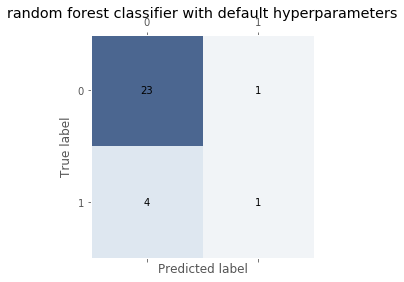

In [19]:
# random forest classifier
# split training/ testing data
from sklearn.model_selection import train_test_split
from sklearn import metrics


x_train, x_test, y_train, y_test = train_test_split(train_numeric_mms, trainLabel, test_size=0.25, random_state=0)
# create model
rfc = RandomForestClassifier()

# fitting training data with the model
rfc.fit(x_train, y_train)

# 將測試資料丟入模型取得預測結果
y_pred = rfc.predict(x_test)

# 利用accuracy評估模型預測結果
print(f'accuracy using gradientboosting classifier with default hyperparameters: {metrics.accuracy_score(y_test, y_pred):.3f}')

# 繪製 confusion matrix
confmat = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat, title = "random forest classifier with default hyperparameters")

In [20]:
test.head()
test.shape

(33, 21)

In [25]:
# in testing data, fill na as 0, minmaxscaler and reserve all features
test_numeric = test.drop(labels = ['name','email_address'], axis=1)
test_numeric = test_numeric.fillna(0)
test_numeric_mms = MinMaxScaler().fit_transform(test_numeric)
test_numeric_mms = pd.DataFrame(test_numeric_mms)
test_numeric_mms.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.053933,0.066826,0.916606,0.0,0.003057,0.003315,0.157706,0.942149,0.177340,0.0,0.000000,0.004938,0.020779,0.328952,0.008014,1.000000,1.000000,0.017754,0.002556
1,0.013868,0.000000,0.999970,0.0,0.000000,0.012589,0.008798,0.578512,0.024631,0.0,0.020079,0.000038,0.021490,0.328952,0.010433,0.288535,0.232512,0.008615,0.000580
2,0.015409,0.000000,0.888650,0.0,0.017763,0.006502,0.010427,0.132231,0.034483,0.0,0.033325,0.000266,0.026011,0.328952,0.009111,0.187466,0.130772,0.000932,0.014709
3,0.030819,0.000000,1.000000,0.0,0.007349,0.016461,1.000000,0.272727,1.000000,0.0,0.026689,0.000039,0.029547,0.328952,0.013674,0.379822,0.387060,0.015322,0.008318
4,0.010273,0.000000,0.991605,0.0,0.000000,0.005859,0.015966,0.239669,0.019704,0.0,0.007213,0.007216,0.038416,0.328952,0.015548,0.287086,0.236766,0.006030,0.005758


In [26]:
# create model
rfc = RandomForestClassifier()

# fitting training data with the model
rfc.fit(train_numeric_mms, trainLabel)

# predict the probability of poi
rfc_pred = rfc.predict_proba(test_numeric_mms)[:, 1]

rfc_pred = pd.DataFrame(rfc_pred)
rfc_pred.head()

,0
0,0.1
1,0.0
2,0.1
3,0.0
4,0.0


In [27]:
test['name'].shape

(33,)

In [28]:
rfc_pred.shape

(33, 1)

In [29]:
# arrange submission data
rfc_pred.columns = ['poi']
submission = pd.concat([test['name'], rfc_pred], axis=1)
submission.head()
print(submission.shape)

(33, 2)


In [30]:
submission.to_csv('submission.csv', index = False)